# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
new_random_cities_df = "starter_code/cities.csv"

# Range of latitudes and longitudes
lat_zone = np.arange(-90, 90, 10)
lon_zone = np.arange(-180, 180, 10)


# Create dataframe for storing data
cities_df = pd.DataFrame()


## Generate Cities List

In [3]:
 #Make columns in dataframe
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["City"] = ""
cities_df["Country"] = ""

# Create 'for' loop to get latitude and longitude values
for coord_lat in lat_zone:
    
    for coord_lon in lon_zone:
        # Get list of latitude and longitude values (0.01 for value to 2 decimal places)
        lat_values = list(np.arange(coord_lat, coord_lat + 15, 0.01))
        lon_values = list(np.arange(coord_lon, coord_lon + 15, 0.01))
        
        # Random latitude and longitude values 
        random_lats = random.sample(lat_values, 50)
        random_lons = random.sample(lon_values, 50)
        
        # Sample of latitude and longitude values
        lat_samples = [coord_lat + lat for lat in random_lats]
        lon_samples = [coord_lon + lon for lon in random_lons]
        
        # Store values in dataframe created
        cities_df = cities_df.append(pd.DataFrame.from_dict({
            "Latitude": lat_samples, 
            "Longitude": lon_samples}))

cities_df = cities_df.reset_index(drop=True)
cities_df.head()

C:\Users\prasanna\Anaconda3\envs\Husky\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,City,Country,Latitude,Longitude
0,NaN,NaN,-167.71,-351.75
1,NaN,NaN,-171.91,-355.79
2,NaN,NaN,-170.46,-347.81
3,NaN,NaN,-179.94,-356.85
4,NaN,NaN,-170.95,-352.62


In [4]:
# Use 'for' loop to locate the neareast city based on latitude and longitude stored in dataframe
for column, row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(column, "City", city.city_name)
    cities_df.set_value(column, "Country", city.country_code)

# Remove Latitude and Longitude columns to get city names and countries only
new_cities_df = cities_df.drop(["Latitude", "Longitude"], axis=1)

# Remove duplicate cities and keep unique cities and countries only
new_cities_df = new_cities_df.drop_duplicates()
new_cities_df.head()
#print(new_cities_df)

C:\Users\prasanna\Anaconda3\envs\Husky\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\prasanna\Anaconda3\envs\Husky\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


,City,Country
0,vaini,to
452,mataura,pf
500,punta arenas,cl
550,ushuaia,ar
900,bredasdorp,za


In [5]:
# Choose 500 random cities based on longitude and latitude
random_cities_df = new_cities_df.sample(550)

# Reset index
random_cities_df = random_cities_df.reset_index(drop=True)
random_cities_df.head()

,City,Country
0,raga,sd
1,bardiyah,ly
2,tiarei,pf
3,murmino,ru
4,heyang,cn


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather"

params = {"appid": "2ec88724f3fad131ccffe1dfb2efab45",
          "units": "metric"}

# Use 'for' loop to retrieve weather info by rows in dataframe
for column, row in random_cities_df.iterrows():
    
    # Reference rows for 'q' param
    params["q"] = f'{row["City"]}, {row["Country"]}'
    
    # Get and print links for each city
    print(f'Weather information for {params["q"]}')
    weather_response = requests.get(url, params)
    print(weather_response.url)
    weather_response  = weather_response.json()
    
    # Get weather data and input into dataframe
    random_cities_df.set_value(column, "Latitude", weather_response.get("coord", {}).get("lat"))
    random_cities_df.set_value(column, "Longitude", weather_response.get("coord", {}).get("lon"))
    random_cities_df.set_value(column, "Temperature", weather_response.get("main", {}).get("temp_max"))
    random_cities_df.set_value(column, "Wind Speed", weather_response.get("wind", {}).get("speed"))
    random_cities_df.set_value(column, "Humidity", weather_response.get("main", {}).get("humidity"))
    random_cities_df.set_value(column, "Cloudiness", weather_response.get("clouds", {}).get("all"))

Weather information for raga, sd
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=raga%2C+sd
Weather information for bardiyah, ly


C:\Users\prasanna\Anaconda3\envs\Husky\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\prasanna\Anaconda3\envs\Husky\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\prasanna\Anaconda3\envs\Husky\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\prasanna\Anaconda3\envs\Husky\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\prasanna\Anaconda3\envs\Husky\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Pleas

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=bardiyah%2C+ly
Weather information for tiarei, pf
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tiarei%2C+pf
Weather information for murmino, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=murmino%2C+ru
Weather information for heyang, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=heyang%2C+cn
Weather information for ruteng, id
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ruteng%2C+id
Weather information for tubruq, ly
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tubruq%2C+ly
Weather information for iberia, pe
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=i

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kattivakkam%2C+in
Weather information for beringovskiy, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=beringovskiy%2C+ru
Weather information for west fargo, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=west+fargo%2C+us
Weather information for muli, mv
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=muli%2C+mv
Weather information for buin, pg
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=buin%2C+pg
Weather information for labe, gn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=labe%2C+gn
Weather information for monastyrshchina, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab4

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=wollongong%2C+au
Weather information for jaisalmer, in
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=jaisalmer%2C+in
Weather information for aksu, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=aksu%2C+cn
Weather information for taguisa, ph
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=taguisa%2C+ph
Weather information for tabou, ci
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tabou%2C+ci
Weather information for barrow, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=barrow%2C+us
Weather information for chegdomyn, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metri

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kodiak%2C+us
Weather information for lieksa, fi
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=lieksa%2C+fi
Weather information for tshikapa, cd
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tshikapa%2C+cd
Weather information for churapcha, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=churapcha%2C+ru
Weather information for doha, kw
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=doha%2C+kw
Weather information for wilmington, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=wilmington%2C+us
Weather information for porto walter, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=myaundzha%2C+ru
Weather information for hermanus, za
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=hermanus%2C+za
Weather information for eyl, so
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=eyl%2C+so
Weather information for rikitea, pf
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=rikitea%2C+pf
Weather information for makakilo city, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=makakilo+city%2C+us
Weather information for saint-georges, gf
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=saint-georges%2C+gf
Weather information for xiangdong, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccf

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=susaki%2C+jp
Weather information for mecca, sa
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=mecca%2C+sa
Weather information for arraial do cabo, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=arraial+do+cabo%2C+br
Weather information for villarrica, cl
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=villarrica%2C+cl
Weather information for peniche, pt
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=peniche%2C+pt
Weather information for okandja, ga
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=okandja%2C+ga
Weather information for yunjinghong, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccff

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=khatanga%2C+ru
Weather information for karonga, mw
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=karonga%2C+mw
Weather information for tomigusuku, jp
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tomigusuku%2C+jp
Weather information for superior, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=superior%2C+us
Weather information for murwara, in
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=murwara%2C+in
Weather information for rabat, ma
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=rabat%2C+ma
Weather information for meulaboh, id
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&un

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=koshurnikovo%2C+ru
Weather information for armidale, au
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=armidale%2C+au
Weather information for bandon, ie
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=bandon%2C+ie
Weather information for cartagena, co
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=cartagena%2C+co
Weather information for namibe, ao
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=namibe%2C+ao
Weather information for tessalit, ml
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tessalit%2C+ml
Weather information for kabin buri, th
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efa

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sabaudia%2C+it
Weather information for nago, jp
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=nago%2C+jp
Weather information for redlands, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=redlands%2C+us
Weather information for formoso do araguaia, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=formoso+do+araguaia%2C+br
Weather information for cayhagan, ph
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=cayhagan%2C+ph
Weather information for nikki, bj
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=nikki%2C+bj
Weather information for newport, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=saiha%2C+in
Weather information for shahr-e babak, ir
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=shahr-e+babak%2C+ir
Weather information for touros, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=touros%2C+br
Weather information for artyom, az
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=artyom%2C+az
Weather information for tarudant, ma
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tarudant%2C+ma
Weather information for teeli, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=teeli%2C+ru
Weather information for moroni, km
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=atambua%2C+id
Weather information for bemidji, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=bemidji%2C+us
Weather information for togur, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=togur%2C+ru
Weather information for chegutu, zw
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=chegutu%2C+zw
Weather information for khelyulya, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=khelyulya%2C+ru
Weather information for joshimath, in
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=joshimath%2C+in
Weather information for chippewa falls, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
random_cities_df.count()

City           550
Country        550
Latitude       483
Longitude      483
Temperature    483
Wind Speed     483
Humidity       483
Cloudiness     483
dtype: int64

In [8]:
# Display dataframe with all info
random_cities_df

# Remove cities with no data available
new_random_cities_df = random_cities_df.dropna()
new_random_cities_df.head(15)

,City,Country,Latitude,Longitude,Temperature,Wind Speed,Humidity,Cloudiness
1,bardiyah,ly,31.76,25.09,16.80,5.16,100.0,88.0
2,tiarei,pf,-17.53,-149.33,26.00,5.10,78.0,75.0
3,murmino,ru,54.60,40.05,-5.43,1.96,91.0,80.0
4,heyang,cn,26.10,107.47,-3.35,1.86,98.0,92.0
5,ruteng,id,-8.61,120.46,22.90,1.56,96.0,44.0
7,iberia,pe,-11.41,-69.49,24.25,1.61,92.0,80.0
8,smolenka,ru,54.28,56.05,-3.00,2.00,68.0,90.0
9,akureyri,is,65.68,-18.09,-7.30,0.81,93.0,76.0
10,cervo,es,43.67,-7.41,14.70,9.06,90.0,32.0
11,loughrea,ie,53.20,-8.57,9.00,12.30,81.0,40.0


In [14]:
# Save data to a CSV file

new_random_cities_df.to_csv("cities.csv")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

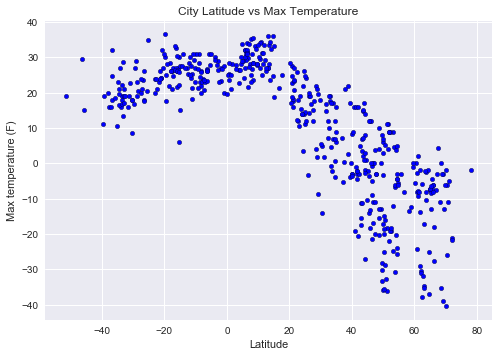

In [12]:
# Plot Temperature (F) vs. Latitude
temp_vs_lat = new_random_cities_df.plot(kind="scatter",
                                        x="Latitude",
                                        y="Temperature",
                                        color="blue",
                                        edgecolor="black",
                                        grid=True)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F)")
plt.savefig("LatVsTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

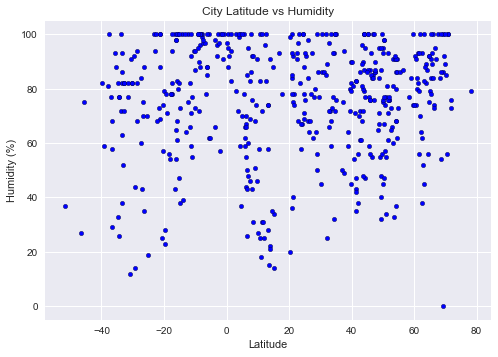

In [15]:
# Plot Humidity (%) vs. Latitude
humid_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Humidity",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

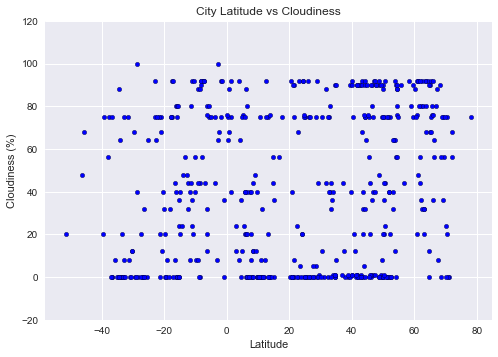

In [16]:
cloud_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Cloudiness",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-20, 120)
plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

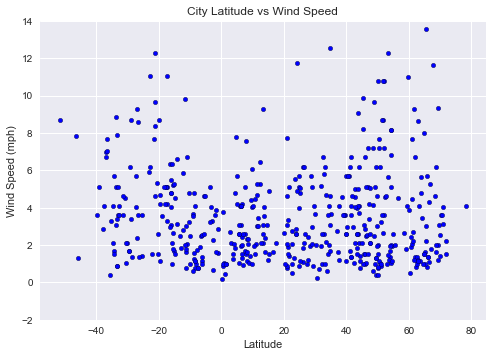

In [17]:
windspeed_vs_lat = new_random_cities_df.plot(kind="scatter",
                                         x="Latitude",
                                         y="Wind Speed",
                                         color="blue",
                                         edgecolor="black",
                                         grid=True)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2, 14)
plt.savefig("LatVsWindSpeed.png")
plt.show()

In [ ]:
Analysis
Latitude vs Temperature
#1. Latitude vs Temperature  graph shows the latitude at 0 is equivalent to the equator. We can see that at 0, the max temperatures 
#are at peack(Highest). As the latitude start increasing going the temperatures start droping. We can conclude as latitude increase
#Temperature decrease. 

Latitude vs Humidity 
#2. Latitude Vs Humidity  graphs shows there is not much changes in humidity as the latitude increase. However it is interesting 
# at 0 (equator) humidity is low compare to higer and lowr latitude

Latitude vs Cloudness and Latitude vs wind speed

# From these two graph we can have conclusion there is no effect of latitude on cloudness and windspeed. 
# Temperatur is the only factor effected by the lattitude .